In [1]:
!pip install phik

In [2]:
!pip install shap

In [3]:
!pip install -Uq scikit-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import phik
import shap
import sklearn
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.metrics import f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score, accuracy_score

from sklearn.metrics import confusion_matrix, recall_score, precision_score

from sklearn.pipeline import Pipeline

In [5]:
# Считываем CSV-файлы с данными с помощью библиотеки pandas и сохраняем их в датафреймы.
train = pd.read_csv('c:/users/olga/downloads/masterskaya/kaggle_startups_train_28062024.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52515 non-null  object 
 1   category_list      50051 non-null  object 
 2   funding_total_usd  42447 non-null  float64
 3   status             52516 non-null  object 
 4   country_code       47014 non-null  object 
 5   state_code         45753 non-null  object 
 6   region             46157 non-null  object 
 7   city               46157 non-null  object 
 8   funding_rounds     52516 non-null  int64  
 9   founded_at         52516 non-null  object 
 10  first_funding_at   52516 non-null  object 
 11  last_funding_at    52516 non-null  object 
 12  closed_at          4917 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


In [6]:
train = train.dropna(subset=['category_list']).reset_index(drop=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50051 entries, 0 to 50050
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               50050 non-null  object 
 1   category_list      50051 non-null  object 
 2   funding_total_usd  41736 non-null  float64
 3   status             50051 non-null  object 
 4   country_code       45754 non-null  object 
 5   state_code         44542 non-null  object 
 6   region             44926 non-null  object 
 7   city               44926 non-null  object 
 8   funding_rounds     50051 non-null  int64  
 9   founded_at         50051 non-null  object 
 10  first_funding_at   50051 non-null  object 
 11  last_funding_at    50051 non-null  object 
 12  closed_at          4188 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.0+ MB


In [7]:
train['category_list'] = train['category_list'].str.split('|')

In [8]:
train = train.explode('category_list').reset_index(drop=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120988 entries, 0 to 120987
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name               120987 non-null  object 
 1   category_list      120988 non-null  object 
 2   funding_total_usd  101832 non-null  float64
 3   status             120988 non-null  object 
 4   country_code       110479 non-null  object 
 5   state_code         107531 non-null  object 
 6   region             108851 non-null  object 
 7   city               108851 non-null  object 
 8   funding_rounds     120988 non-null  int64  
 9   founded_at         120988 non-null  object 
 10  first_funding_at   120988 non-null  object 
 11  last_funding_at    120988 non-null  object 
 12  closed_at          10043 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.0+ MB


In [9]:
train = train.dropna(subset=['funding_total_usd', 'city']).reset_index(drop=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92037 entries, 0 to 92036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               92036 non-null  object 
 1   category_list      92037 non-null  object 
 2   funding_total_usd  92037 non-null  float64
 3   status             92037 non-null  object 
 4   country_code       92037 non-null  object 
 5   state_code         90625 non-null  object 
 6   region             92037 non-null  object 
 7   city               92037 non-null  object 
 8   funding_rounds     92037 non-null  int64  
 9   founded_at         92037 non-null  object 
 10  first_funding_at   92037 non-null  object 
 11  last_funding_at    92037 non-null  object 
 12  closed_at          6762 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 9.1+ MB


In [10]:
train = train.dropna(subset=['state_code']).reset_index(drop=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90625 entries, 0 to 90624
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               90624 non-null  object 
 1   category_list      90625 non-null  object 
 2   funding_total_usd  90625 non-null  float64
 3   status             90625 non-null  object 
 4   country_code       90625 non-null  object 
 5   state_code         90625 non-null  object 
 6   region             90625 non-null  object 
 7   city               90625 non-null  object 
 8   funding_rounds     90625 non-null  int64  
 9   founded_at         90625 non-null  object 
 10  first_funding_at   90625 non-null  object 
 11  last_funding_at    90625 non-null  object 
 12  closed_at          6672 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 9.0+ MB


In [11]:
train = train.drop(['closed_at'],axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90625 entries, 0 to 90624
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               90624 non-null  object 
 1   category_list      90625 non-null  object 
 2   funding_total_usd  90625 non-null  float64
 3   status             90625 non-null  object 
 4   country_code       90625 non-null  object 
 5   state_code         90625 non-null  object 
 6   region             90625 non-null  object 
 7   city               90625 non-null  object 
 8   funding_rounds     90625 non-null  int64  
 9   founded_at         90625 non-null  object 
 10  first_funding_at   90625 non-null  object 
 11  last_funding_at    90625 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 8.3+ MB


In [12]:
cat_freq = train['category_list'].value_counts(normalize=True).to_frame()
cat_freq.tail()

,category_list
Made in Italy,0.000011
Mothers,0.000011
Sex Industry,0.000011
Social Activists,0.000011
Private School,0.000011


In [13]:
train = train.join(cat_freq, on='category_list', rsuffix='_freq')
train.sample(5)

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category_list_freq
34982,GeneCentric Diagnostics,Biotechnology,25000000.0,operating,USA,NC,Raleigh,Durham,3,2011-01-01,2012-01-20,2015-01-14,0.036348
54551,Objective Logistics,Big Data,9000000.0,operating,USA,MA,Boston,Boston,4,2009-01-01,2010-11-19,2013-07-18,0.006731
72557,Trucker Path,Transportation,21500000.0,operating,USA,CA,SF Bay Area,Campbell,3,2013-10-28,2014-09-01,2015-06-30,0.002582
70841,Lilikoi,Web Development,20000.0,operating,USA,HI,Honolulu,Kahuku,1,2014-02-08,2014-10-14,2014-10-14,0.003829
82179,Boomr,Mobile,135000.0,operating,USA,CA,SF Bay Area,San Francisco,1,2013-09-01,2012-12-20,2012-12-20,0.037098


In [14]:
def category_rare(df, col, threshold=0.005):
    s=df[col].value_counts(normalize=True)
    rare = s[s < threshold].index
    df[col] = df[col].replace(rare, 'Other')
    return df

In [15]:
train = category_rare(train, 'category_list', 0.01)
train.sample(10)

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category_list_freq
43276,Swagsy,Other,100000.0,operating,USA,CA,Los Angeles,Los Angeles,1,2011-01-01,2012-06-01,2012-06-01,0.001810
47203,Lifeguard Health Networks,Other,2650000.0,operating,USA,PA,Philadelphia,Wayne,2,2011-03-04,2013-06-01,2015-05-01,0.000916
34590,Knetik,Other,2600000.0,operating,USA,FL,Orlando,Altamonte Springs,5,2010-04-01,2011-01-01,2015-01-20,0.002163
49773,Neronote,Other,200000.0,operating,ITA,10,Ancona,Ancona,1,2010-01-01,2010-01-01,2010-01-01,0.000287
86328,CoPromote,Social Media,6280622.0,operating,USA,NY,New York City,New York,13,2009-08-01,2009-09-15,2015-11-05,0.018847
74066,SaaSAssurance,SaaS,121372.0,operating,GBR,H9,London,London,2,2010-01-01,2013-05-01,2014-08-01,0.014102
5036,iFLYER,Other,86994.0,operating,JPN,40,Tokyo,Tokyo,1,2006-07-07,2006-07-07,2006-07-07,0.005308
29449,IRIS.TV,Other,7000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,2012-07-01,2013-10-04,2015-06-17,0.000684
62002,CIRQY,E-Commerce,12000.0,operating,EGY,11,Cairo,Cairo,1,2012-09-01,2012-09-01,2012-09-01,0.026681
5177,Three Screen Games,Other,500000.0,closed,USA,PA,Philadelphia,Yardley,1,2009-01-01,2009-10-07,2009-10-07,0.004690


In [16]:
train['category_list'].value_counts(normalize=True)

Other                  0.609743
Software               0.061418
Mobile                 0.037098
Biotechnology          0.036348
E-Commerce             0.026681
Enterprise Software    0.020314
Curated Web            0.019774
Social Media           0.018847
Health Care            0.017181
Advertising            0.017103
SaaS                   0.014102
Games                  0.013804
Health and Wellness    0.013617
Analytics              0.013076
Internet               0.012800
Education              0.012017
Finance                0.011652
Technology             0.011531
Hardware + Software    0.011189
Clean Technology       0.010946
Apps                   0.010759
Name: category_list, dtype: float64

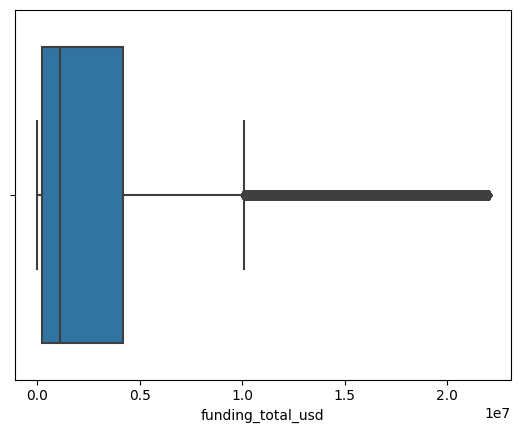

In [19]:
sns.boxplot(x=train["funding_total_usd"]);

In [18]:
q_low = train['funding_total_usd'].quantile(0.25)
q_hi = train['funding_total_usd'].quantile(0.75)
q_range = q_hi - q_low
train = train[(train['funding_total_usd'] < q_hi + 1.5 * q_range) & (train['funding_total_usd'] > q_low - 1.5 * q_range)]

In [20]:
train = train.dropna(subset=['name']).reset_index(drop=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77974 entries, 0 to 77973
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                77974 non-null  object 
 1   category_list       77974 non-null  object 
 2   funding_total_usd   77974 non-null  float64
 3   status              77974 non-null  object 
 4   country_code        77974 non-null  object 
 5   state_code          77974 non-null  object 
 6   region              77974 non-null  object 
 7   city                77974 non-null  object 
 8   funding_rounds      77974 non-null  int64  
 9   founded_at          77974 non-null  object 
 10  first_funding_at    77974 non-null  object 
 11  last_funding_at     77974 non-null  object 
 12  category_list_freq  77974 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 7.7+ MB


In [21]:
train['country_code'].value_counts()

USA    48613
GBR     5454
CAN     2865
IND     1722
FRA     1660
       ...  
RWA        1
IRN        1
CMR        1
DZA        1
KNA        1
Name: country_code, Length: 108, dtype: int64

In [22]:
train['country_code_cat'] = train['country_code'].apply(lambda x: 1 if x == 'USA' else 0)

In [23]:
train['founded_at'] = pd.to_datetime(train['founded_at'], format='%Y-%m-%d')
train['first_funding_at'] = pd.to_datetime(train['first_funding_at'], format='%Y-%m-%d')
train['last_funding_at'] = pd.to_datetime(train['last_funding_at'], format='%Y-%m-%d')

In [24]:
# разница, выраженная в днях
train["days_between_first_last_funding"] = \
(train['last_funding_at'] - train['first_funding_at']).dt.days
# разница, выраженная в днях
train["lifetime"] = \
(train['last_funding_at'] - train['founded_at']).dt.days # от даты основания до последнего фандинга

In [25]:
train.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category_list_freq,country_code_cat,days_between_first_last_funding,lifetime
0,Lunchgate,Other,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,0.001015,0,1310,1871
1,Lunchgate,Other,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,0.002097,0,1310,1871
2,Connected Sports Ventures,Mobile,4300000.0,operating,USA,NJ,Newark,Princeton,1,2011-04-16,2012-11-12,2012-11-12,0.037098,1,0,576
3,Mesh Networks,Software,4300000.0,operating,USA,TX,Houston,Houston,1,2005-01-01,2014-11-09,2014-11-09,0.061418,1,0,3599
4,Vidatronic,Other,1250500.0,operating,USA,TX,Austin,College Station,2,2010-01-01,2011-08-23,2013-03-21,0.005330,1,576,1175


In [26]:
train['ratio_fund_rounds'] = round(train['funding_total_usd']/train['funding_rounds'], 2) # отношение, деньги на один раунд

In [27]:
train['status_category'] = train['status'].apply(lambda x: 1 if x == 'closed' else 0)

In [28]:
train = train.drop(train[train['lifetime'] < 0].index)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75208 entries, 0 to 77973
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   name                             75208 non-null  object        
 1   category_list                    75208 non-null  object        
 2   funding_total_usd                75208 non-null  float64       
 3   status                           75208 non-null  object        
 4   country_code                     75208 non-null  object        
 5   state_code                       75208 non-null  object        
 6   region                           75208 non-null  object        
 7   city                             75208 non-null  object        
 8   funding_rounds                   75208 non-null  int64         
 9   founded_at                       75208 non-null  datetime64[ns]
 10  first_funding_at                 75208 non-null  datetime6

In [30]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(
    train.drop(['name', 'status', 'country_code', 'state_code', 'region', 'city', 'founded_at', \
                'first_funding_at', 'last_funding_at', 'status_category'], axis=1),
    train['status_category'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = train['status_category'])

X_train.shape, X_test.shape

((56406, 8), (18802, 8))

In [31]:
# создаём списки с названиями признаков
ohe_columns = ['category_list', 'country_code_cat']
#ord_columns = []
num_columns = ['funding_total_usd', 'funding_rounds', 'category_list_freq', 'days_between_first_last_funding',\
            'lifetime', 'ratio_fund_rounds']

In [32]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse_output=False))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier(metric='cityblock')],
        'models__n_neighbors': range(2, 4),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__degree': range(3, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    },
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            #penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='f1',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['category_list',
                                                   'country_code_cat']),
                                                 ('num', 'passthrough',
                                                  ['funding_total_usd',
                                                   'funding_r

In [33]:
y_test_pred = randomized_search.predict(X_test)

In [34]:
f1_score(y_test, y_test_pred)

0.583963691376702

Это значительно лучше, чем то, что у меня было, поэтому пока остановлюсь на таком результате! Чтобы успеть сдать!!

Теперь я должна прогнать это на Тестовом Наборе из Условия!!

In [35]:
test = pd.read_csv('c:/users/olga/downloads/masterskaya/kaggle_startups_test_28062024.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   first_funding_at   13125 non-null  object 
 9   last_funding_at    13125 non-null  object 
 10  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


In [36]:
test['category_list'].fillna("Other", inplace=True)

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      13125 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   first_funding_at   13125 non-null  object 
 9   last_funding_at    13125 non-null  object 
 10  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


In [38]:
test['category_list'] = test['category_list'].str.split('|')

In [39]:
test = test.explode('category_list').reset_index(drop=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30876 entries, 0 to 30875
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               30876 non-null  object 
 1   category_list      30876 non-null  object 
 2   funding_total_usd  25502 non-null  float64
 3   country_code       27981 non-null  object 
 4   state_code         27155 non-null  object 
 5   region             27513 non-null  object 
 6   city               27515 non-null  object 
 7   funding_rounds     30876 non-null  int64  
 8   first_funding_at   30876 non-null  object 
 9   last_funding_at    30876 non-null  object 
 10  lifetime           30876 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 2.6+ MB


In [40]:
cat_freq_test = test['category_list'].value_counts(normalize=True).to_frame()
cat_freq_test.tail()

,category_list
Independent Music Labels,0.000032
Niche Specific,0.000032
PC Gaming,0.000032
Graphic Design,0.000032
Social Activists,0.000032


In [41]:
test = test.join(cat_freq_test, on='category_list', rsuffix='_freq')
test.sample(5)

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime,category_list_freq
11186,Hale Hau'oli Adult Day Care,Medical,NaN,USA,HI,Honolulu,Aiea,1,2015-09-04,2015-09-04,931,0.007935
13060,Rippld,Digital Media,78500.0,USA,CA,SF Bay Area,San Francisco,2,2012-08-09,2013-06-18,2557,0.003789
9298,Wintermute,Security,NaN,USA,VA,"Washington, D.C.",Reston,1,2008-01-01,2008-01-01,3318,0.006639
5692,NativeX,Advertising Platforms,NaN,USA,MN,St. Cloud,Sartell,2,2000-05-01,2005-01-01,6454,0.000972
5038,The FeedRoom,Public Relations,69300000.0,USA,NY,New York City,New York,7,2000-08-22,2008-07-09,6697,0.002688


In [42]:
test = category_rare(test, 'category_list', 0.01)
test.sample(10)

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime,category_list_freq
24894,XTuit Pharmaceuticals,Other,2.600000e+07,USA,MA,Boston,Cambridge,2,2014-12-05,2015-06-11,2557,0.002980
27991,Tripwire,Software,8.301265e+06,USA,OR,"Portland, Oregon",Portland,2,2003-07-09,2009-08-21,7670,0.055286
3190,tomoguides,Other,NaN,USA,WA,Seattle,Seattle,1,2012-08-01,2012-08-01,857,0.000421
20779,Healios K.K,Biotechnology,2.916799e+07,JPN,40,Tokyo,Tokyo,1,2013-10-08,2013-10-08,2503,0.028274
21564,Like.fm,Curated Web,NaN,NaN,NaN,NaN,NaN,1,2011-03-01,2011-03-01,2922,0.019595
19331,Daylight Studios,Other,1.171460e+06,SGP,NaN,Singapore,Singapore,2,2013-06-01,2015-03-17,2437,0.001943
2695,Melty,Internet,1.562007e+07,FRA,A8,Paris,Paris,2,2012-07-06,2015-11-26,4748,0.012599
7315,SENSU,Other,8.000000e+04,JPN,40,Tokyo,Tokyo,1,2014-10-17,2014-10-17,1153,0.000777
8846,MadeUp,Other,NaN,ITA,20,Venice,Treviso,1,2014-10-22,2014-10-22,1490,0.002980
23095,Housejoy,Internet,4.000000e+06,IND,19,Bangalore,Bengaluru,1,2015-06-20,2015-06-20,1461,0.012599


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30876 entries, 0 to 30875
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                30876 non-null  object 
 1   category_list       30876 non-null  object 
 2   funding_total_usd   25502 non-null  float64
 3   country_code        27981 non-null  object 
 4   state_code          27155 non-null  object 
 5   region              27513 non-null  object 
 6   city                27515 non-null  object 
 7   funding_rounds      30876 non-null  int64  
 8   first_funding_at    30876 non-null  object 
 9   last_funding_at     30876 non-null  object 
 10  lifetime            30876 non-null  int64  
 11  category_list_freq  30876 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 2.8+ MB


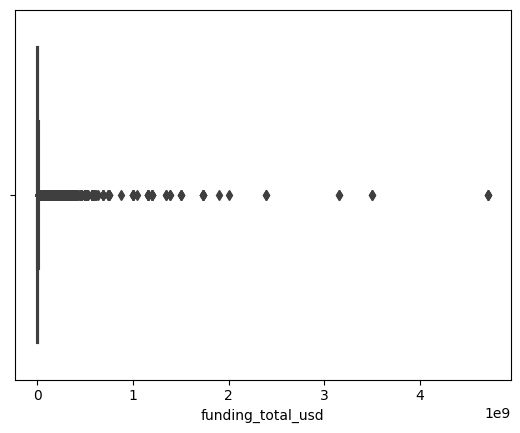

In [46]:
sns.boxplot(x=test["funding_total_usd"]);

In [45]:
median_value = test['funding_total_usd'].median()
test['funding_total_usd'].fillna(median_value, inplace=True)

In [47]:
test['country_code'].value_counts()

USA    17266
GBR     1818
CAN      850
DEU      677
IND      605
       ...  
ZMB        1
CMR        1
BWA        1
LBN        1
HRV        1
Name: country_code, Length: 96, dtype: int64

In [48]:
test['country_code_cat'] = test['country_code'].apply(lambda x: 1 if x == 'USA' else 0)

In [49]:
test['country_code_cat'].fillna(0, inplace=True)

In [50]:
#train['founded_at'] = pd.to_datetime(train['founded_at'], format='%Y-%m-%d')
test['first_funding_at'] = pd.to_datetime(test['first_funding_at'], format='%Y-%m-%d')
test['last_funding_at'] = pd.to_datetime(test['last_funding_at'], format='%Y-%m-%d')

In [51]:
# разница, выраженная в днях
test["days_between_first_last_funding"] = \
(test['last_funding_at'] - test['first_funding_at']).dt.days

In [52]:
test['ratio_fund_rounds'] = round(test['funding_total_usd']/test['funding_rounds'], 2) # отношение, деньги на один раунд

In [55]:
test.head()

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime,category_list_freq,country_code_cat,days_between_first_last_funding,ratio_fund_rounds
0,Crystalsol,Clean Technology,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501,0.010656,0,0,2819200.0
1,JBI Fish & Wings,Other,1500000.0,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717,0.005474,1,0,1500000.0
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295,0.011951,0,126,214128.5
3,Imagine Communications,Software,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748,0.055286,1,1935,8675000.0
4,Imagine Communications,Other,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748,0.006510,1,1935,8675000.0


In [54]:
test_for_model = test[['category_list', 'funding_total_usd','funding_rounds','category_list_freq','country_code_cat',\
             'days_between_first_last_funding', 'lifetime', 'ratio_fund_rounds']]
test_for_model.head()

,category_list,funding_total_usd,funding_rounds,category_list_freq,country_code_cat,days_between_first_last_funding,lifetime,ratio_fund_rounds
0,Clean Technology,2819200.0,1,0.010656,0,0,3501,2819200.0
1,Other,1500000.0,1,0.005474,1,0,2717,1500000.0
2,Finance,428257.0,2,0.011951,0,126,1295,214128.5
3,Software,34700000.0,4,0.055286,1,1935,4748,8675000.0
4,Other,34700000.0,4,0.006510,1,1935,4748,8675000.0


In [56]:
test['status_pred'] = randomized_search.predict(test_for_model)

In [71]:
test[test['name'].duplicated(keep=False)].head()

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime,category_list_freq,country_code_cat,days_between_first_last_funding,ratio_fund_rounds,status_pred
3,Imagine Communications,Software,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748,0.055286,1,1935,8675000.0,0
4,Imagine Communications,Other,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748,0.006510,1,1935,8675000.0,0
5,Imagine Communications,Other,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748,0.002591,1,1935,8675000.0,0
7,Quickfire Games,Other,160000.0,NaN,NaN,NaN,NaN,2,2013-09-18,2014-09-18,1583,0.003725,0,365,80000.0,0
8,Quickfire Games,Other,160000.0,NaN,NaN,NaN,NaN,2,2013-09-18,2014-09-18,1583,0.006283,0,365,80000.0,0


Из нескольких предсказанных статусов я хочу оставить тот, у которого частота категории выше!

In [67]:
_idx = test.groupby('name')['category_list_freq'].idxmax()
result = test.loc[_idx]

In [77]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13125 entries, 12201 to 7281
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   name                             13125 non-null  object        
 1   category_list                    13125 non-null  object        
 2   funding_total_usd                13125 non-null  float64       
 3   country_code                     11743 non-null  object        
 4   state_code                       11430 non-null  object        
 5   region                           11536 non-null  object        
 6   city                             11538 non-null  object        
 7   funding_rounds                   13125 non-null  int64         
 8   first_funding_at                 13125 non-null  datetime64[ns]
 9   last_funding_at                  13125 non-null  datetime64[ns]
 10  lifetime                         13125 non-null  int64 

In [75]:
result['status'] = result['status_pred'].apply(lambda x: 'closed' if x == 1 else 'operating')

In [78]:
result_sample = result[['name','status']]

In [83]:
result['status_pred'].sum()

373

In [81]:
result_sample.to_csv('result_sample_masterskaya.csv', sep=',', index=False, encoding='utf-8')

In [73]:
sample = pd.read_csv('c:/users/olga/downloads/masterskaya/kaggle_startups_sample_submit_28062024.csv')

In [74]:
sample['status_pred'] = 

,name,status
0,Crystalsol,closed
1,JBI Fish & Wings,operating
2,COINPLUS,closed
3,Imagine Communications,closed
4,DNA13,operating
